In [1]:
%pylab inline
from course_report_plots import *

Populating the interactive namespace from numpy and matplotlib


# Background
* the time delay challenge 2014
* LSST

## Introduction to the data

* data generation
* ground truth information
* FIG. one centered and one raw LC pair with and without error bars
* FIG. Histograms (maybe?)
* XX pair systems and XX quadratic ones - we ignore the quadratic systems (for this phase)

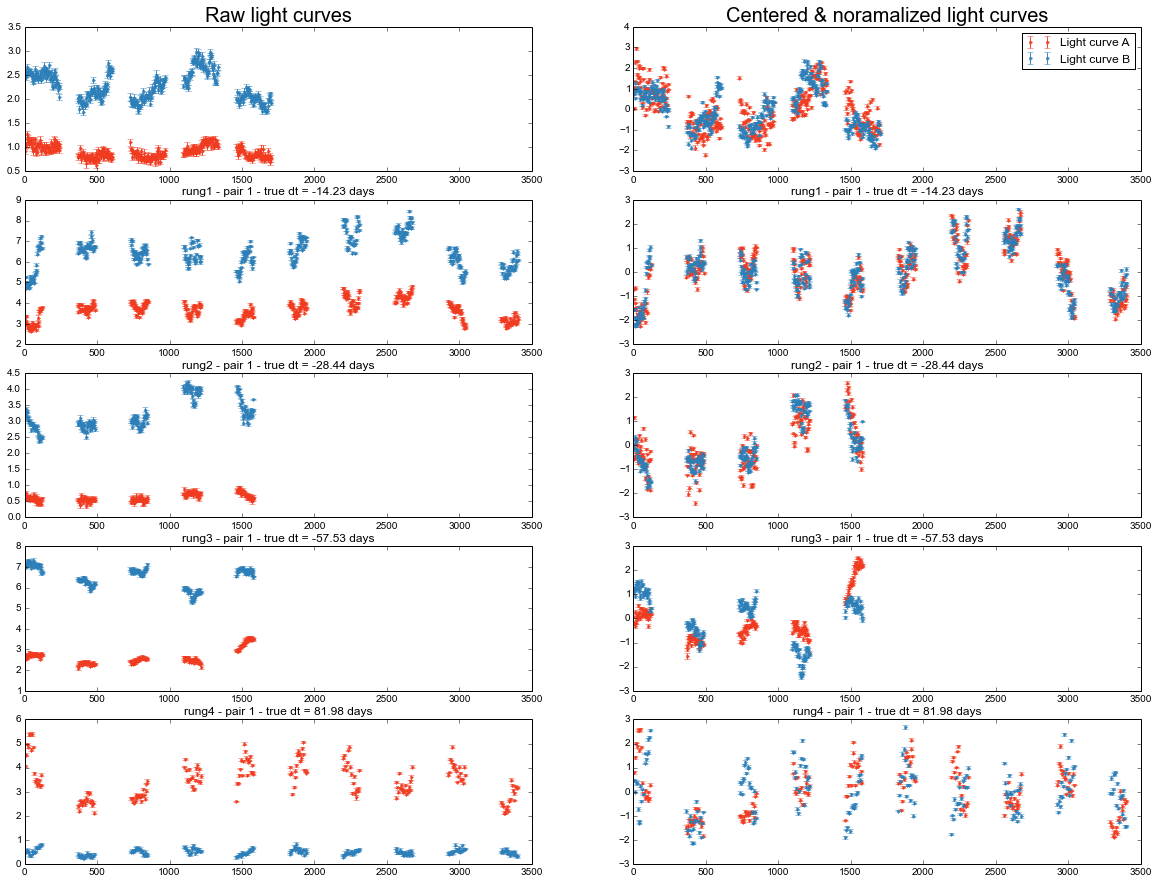

In [2]:
make_fig_1()

# Methodology

## Over all strategy

The original contestants of the Time Delay Challenge did not have access to any dataset with ground truth. As a consequence most of the teams used unsupervised learning methods (did they??). However one of the teams used a supervised learning approach after manually labeling their data. 

Our approach is losely based on theirs. However we have not had to resort to manually labeled data, as ground truth has been published for one of the datasets after the end of the challenge.

Basic steps:

* Split light curves into continuous observation windows
* Smooth the light curves and interpolate evenly sampled data
* Correlate the two light curves for each window
  * Find the time offset of the maximum correlation for each window
* Calculate the mean, median and standard deviation of this time offset among the windows for each light curve pair
* Use a clustering algorithm to cluster the mean, median and stddev for each real dt
* Apply a regression method to the clustered values

## Failed attempts
During our experimentation we applied a few methods that did not yield any correlation, or a much too weak correlation to be useful. The following is a (possibly incomplete) list of those aproaches, and our hypothesis for why they failed:

### FFT

We tried to apply an FFT to the interpolated, evenly sampled data, hypothesising that the phase (angle of the complex FFT value) of the highest-amplitude frequency would correlate with the real dt.

Inside each window, the signal is highly a-periodic, which probably introduces a lot of noise.

### Lomb-Scargle periodograms

Lomb-Scargle periodograms are supposed to do what an FFT does, but for unevenly sampled data. Unfortunately it failed to even give amplitudes similar to those calculated by the FFT of the interpolated data.

### Mean squared error correlation

We assumed that different ways of correlating the two light curves would pick up on different features of the curves (??), and so might be usefull in combination as features. Only the stddev between the MSE of the windows turned out to have any, and only a very weak, correlation with the real dt, and there was no correlation with the sign of the real dt.


window 2015.0...
window 2016.0...
window 2017.0...
window 2018.0...
window 2019.0...


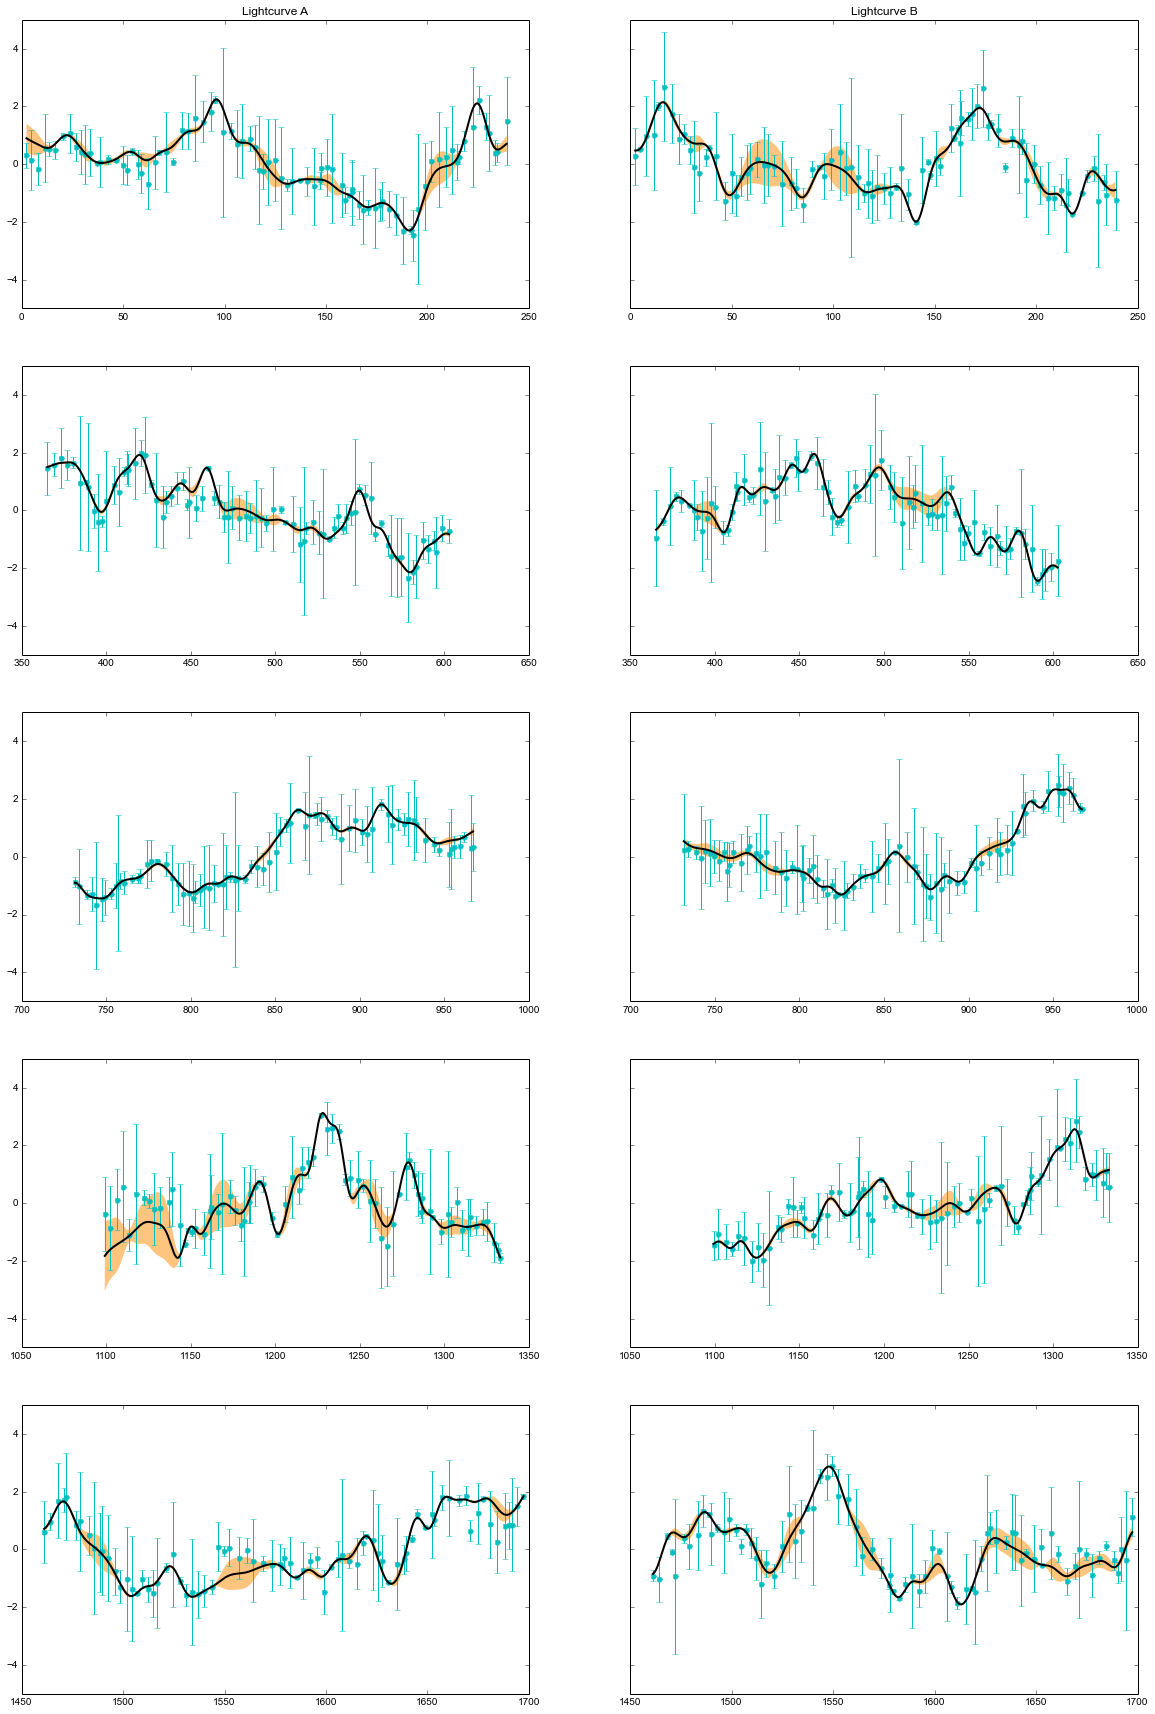

In [3]:
make_fig_2()